# Regional Electricity Demand Data

{badge}`python3,badge-success` {badge}`exploratory data analysis,badge-secondary` {badge}`energy market,badge-warning` 

**Regional demand datae** is 

## Imports

### Libraries

In [5]:
import glob
import pandas as pd
import os

### Functions

In [6]:
def concatenate_csv_local(file_dir, dest_dir, output_filename="output"):
    """
    Conatenates multiple hourly csv into one daily file. 
    """
    try:
        files = glob.glob(os.path.join(file_dir, "RTDREG_*.csv")) 
        
        date_columns = ['RUN_TIME','TIME_INTERVAL']
            
        df = pd.concat((pd.read_csv(f, header = 0, error_bad_lines=False, skipfooter=1, engine='python', parse_dates=date_columns) for f in files))
        df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
        df.to_csv(os.path.join(dest_dir, "Combined-{}.csv".format(output_filename)), index=False)
        print("Concatenate sucess: RTD-{}.csv".format(output_filename))
        
    except ValueError:
        print("File not found: {}".format(output_filename))

### DataFrame html format

In [7]:
t_props = [
  ('font-size', '80%')
  ]
   
styles = [
  dict(selector="th", props=t_props),
  dict(selector="td", props=t_props)
  ]

### Paths

In [8]:
dir = "/Volumes/data/projects/django-mms/data/demand_daily"

### Loading data

In [9]:
concatenate_csv_local(dir,dir,"regional-demand")
filename = os.path.join(dir, "Combined-regional-demand" + "." + "csv")
df = pd.read_csv(filename)

Concatenate sucess: RTD-regional-demand.csv


## Data wrangling

Dataset consists of 5-min market clearing prices from July 26, 2021, start of the 5-Min market up to Aug 14. 'RESOURCE_NAME' indicates the clearing plant.

In [10]:
df.head().style.set_table_styles(styles)

,RUN_TIME,MKT_TYPE,TIME_INTERVAL,REGION_NAME,COMMODITY_TYPE,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
0,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,Dr,500.000000,0,nan,0.000000,470.000000,0.000000,0.000000
1,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CMIN,Dr,150.000000,0,nan,0.000000,125.000000,0.000000,0.000000
2,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CVIS,Dr,138.000000,0,nan,0.000000,130.290000,0.000000,0.000000
3,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,En,7493.100000,320,0.000000,129.660000,7879.430000,63.330000,0.000000
4,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CVIS,En,1476.130000,0,0.000000,20.040000,1559.500000,0.000000,63.330000


In [11]:
df.describe()

,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
count,213590.000000,213590.000000,43200.000000,213590.000000,213590.000000,213590.000000,213590.000000
mean,938.039390,10.136804,1.352876,15.088959,907.346874,11.490675,11.490675
std,2079.679786,61.754928,30.445146,39.606992,2138.166983,52.102701,52.102701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,0.000000,0.000000,0.000000,25.500000,0.000000,0.000000
50%,169.000000,0.000000,0.000000,0.000000,133.500000,0.000000,0.000000
75%,590.000000,0.000000,0.000000,0.000000,402.000000,0.000000,0.000000
max,10881.590000,480.000000,1632.500000,329.610000,10891.280000,420.000000,420.000000


In [13]:
df.isnull().sum()

RUN_TIME               0
MKT_TYPE               0
TIME_INTERVAL          0
REGION_NAME            0
COMMODITY_TYPE         0
MKT_REQT               0
LOAD_BID               0
LOAD_CURTAILED    170390
LOSSES                 0
GENERATION             0
MKT_IMPORT             0
MKT_EXPORT             0
dtype: int64

In [15]:
df = df.fillna(0)

## Commodity Type

In [18]:
df['COMMODITY_TYPE'].unique()

array(['Dr', 'En', 'Fr', 'Rd', 'Ru'], dtype=object)

In [22]:
df[df['REGION_NAME']=='CLUZ']

,RUN_TIME,MKT_TYPE,TIME_INTERVAL,REGION_NAME,COMMODITY_TYPE,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
0,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,Dr,500.0,0,0.0,0.00,470.00,0.00,0.0
3,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,En,7493.1,320,0.0,129.66,7879.43,63.33,0.0
8,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,Fr,550.0,0,0.0,0.00,251.00,0.00,0.0
10,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,Rd,171.5,0,0.0,0.00,93.00,0.00,0.0
12,2021-06-26 00:00:00,RTD,2021-06-26 00:05:00,CLUZ,Ru,171.5,0,0.0,0.00,110.50,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
213575,2021-08-14 23:55:00,RTD,2021-08-15 00:00:00,CLUZ,Dr,590.0,0,0.0,0.00,590.00,0.00,0.0
213578,2021-08-14 23:55:00,RTD,2021-08-15 00:00:00,CLUZ,En,7823.9,320,0.0,117.07,7923.46,337.47,0.0
213583,2021-08-14 23:55:00,RTD,2021-08-15 00:00:00,CLUZ,Fr,647.0,0,0.0,0.00,90.00,0.00,0.0
213585,2021-08-14 23:55:00,RTD,2021-08-15 00:00:00,CLUZ,Rd,167.5,0,0.0,0.00,167.50,0.00,0.0


## Create separate dataframe for each region and En commodity type

So that we can use unique datetime index

In [46]:
df_luz = df[df['REGION_NAME']=='CLUZ'].copy()
df_min = df[df['REGION_NAME']=='CMIN'].copy()
df_vis = df[df['REGION_NAME']=='CVIS'].copy()

In [47]:
# Removing AM/PM from RUN_TIME
df_luz['TIME_INTERVAL'] = df_luz['TIME_INTERVAL'].str.replace(r'[^\W\d_]', '')

# Setting RUN_TIME to datetime
df_luz['TIME_INTERVAL'] = pd.to_datetime(df_luz['TIME_INTERVAL'])

# Setting RUN_TIME as sorted index
df_luz = df_luz.set_index('TIME_INTERVAL')
df_luz = df_luz.sort_index()

ipykernel_launcher:2: FutureWarning: The default value of regex will change from True to False in a future version.


In [53]:
df_luz[df_luz['COMMODITY_TYPE']=='En'].head()

,RUN_TIME,MKT_TYPE,REGION_NAME,COMMODITY_TYPE,MKT_REQT,LOAD_BID,LOAD_CURTAILED,LOSSES,GENERATION,MKT_IMPORT,MKT_EXPORT
TIME_INTERVAL,,,,,,,,,,,
2021-06-26 00:05:00,2021-06-26 00:00:00,RTD,CLUZ,En,7493.10,320,0.0,129.66,7879.43,63.33,0.0
2021-06-26 00:10:00,2021-06-26 00:05:00,RTD,CLUZ,En,7533.40,320,0.0,130.97,7889.06,95.37,0.0
2021-06-26 00:15:00,2021-06-26 00:10:00,RTD,CLUZ,En,7581.61,320,0.0,132.00,7992.52,41.11,0.0
2021-06-26 00:20:00,2021-06-26 00:15:00,RTD,CLUZ,En,7977.25,320,0.0,145.11,8284.98,157.33,0.0
2021-06-26 00:25:00,2021-06-26 00:20:00,RTD,CLUZ,En,7662.02,320,0.0,135.73,8062.34,55.41,0.0


In [54]:
df_luz_hr = df_luz[df_luz['COMMODITY_TYPE']=='En'].resample('1H').mean()
df_luz_day = df_luz[df_luz['COMMODITY_TYPE']=='En'].resample('1D').mean()
df_luz_7d = df_luz[df_luz['COMMODITY_TYPE']=='En'].rolling('7D').mean()

# Plotting

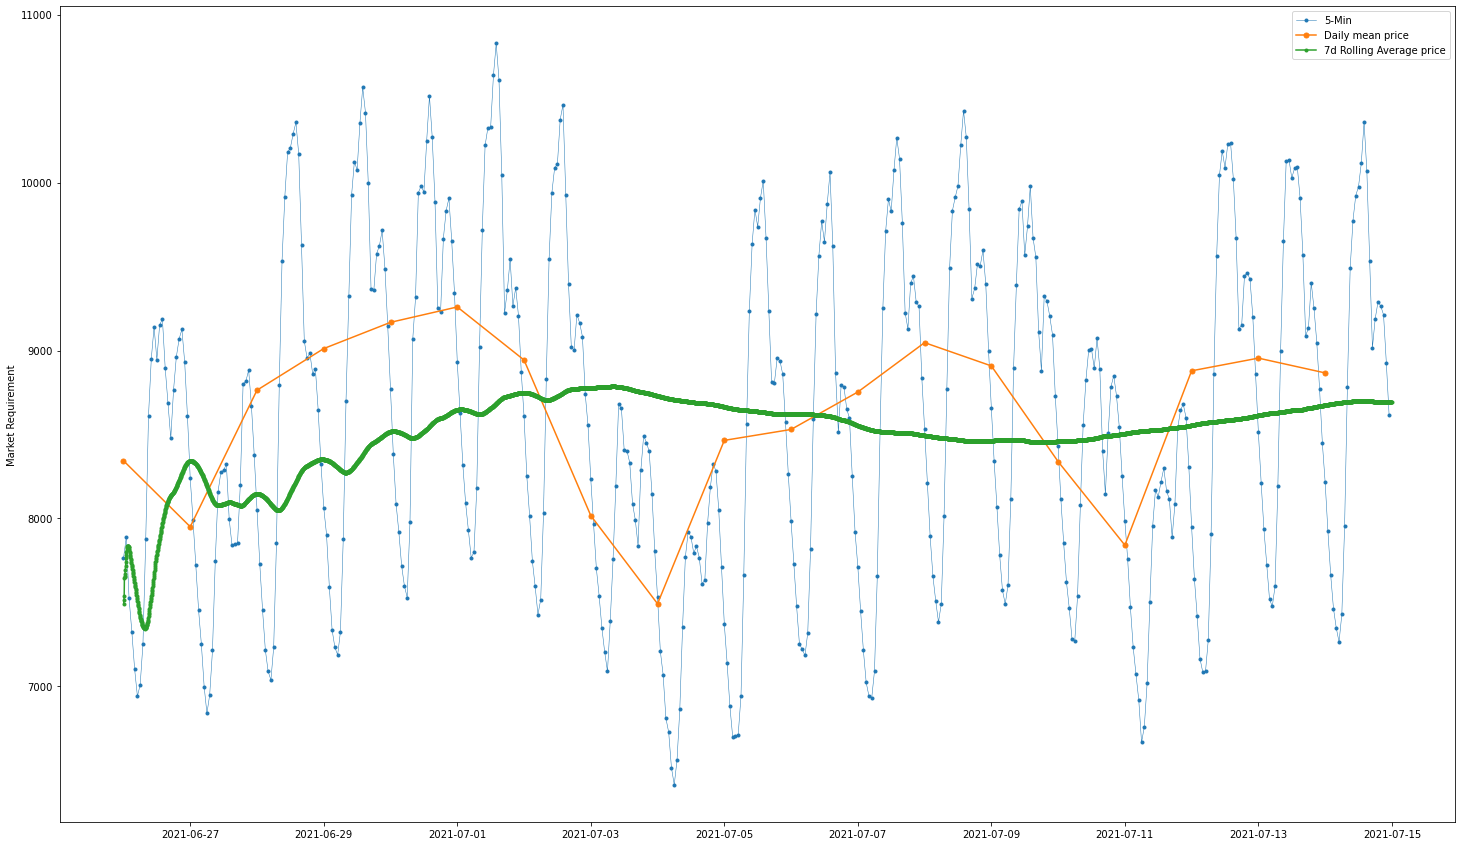

In [55]:
import matplotlib.pyplot as plt

start, end = '2021-06-26', '2021-07-14'

fig, ax = plt.subplots(figsize=(25,15))

ax.plot(df_luz_hr.loc[start:end, 'MKT_REQT'], marker='.', linestyle='-', linewidth=0.5, label='5-Min')
ax.plot(df_luz_day.loc[start:end, 'MKT_REQT'], marker='o', markersize=5, linestyle='-', label = 'Daily mean price')
ax.plot(df_luz_7d.loc[start:end, 'MKT_REQT'], marker='.', linestyle='-', label='7d Rolling Average price')
ax.set_ylabel('Market Requirement')

ax.legend()